In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 200
pd.options.display.max_rows = 100
color = sns.color_palette()
sns.set(style="white")

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 500)

In [8]:
vehicles = pd.read_csv("Vehicles_done.csv", low_memory=False, index_col="Num_Acc")

In [10]:
new_vehicles = vehicles.drop(["Unnamed: 0"], axis=1)
new_vehicles

,count_veh,diff_cat
Num_Acc,,
200500000001,2,0
200500000002,2,1
200500000003,2,0
200500000004,3,0
200500000005,1,0
200500000006,1,0
200500000007,2,1
200500000008,1,0
200500000009,2,0


In [11]:
new_vehicles = pd.concat([new_vehicles, pd.get_dummies(new_vehicles.diff_cat, prefix=col, prefix_sep='_')], axis=1)
new_vehicles.drop(col, axis=1, inplace=True)

In [12]:
new_vehicles.columns

Index(['count_veh', 'diff_cat_0', 'diff_cat_1'], dtype='object')

In [13]:
cluster_vehicles = new_vehicles.drop(columns=["diff_cat_0"], axis=1)

In [15]:
cluster_vehicles.head()

,count_veh,diff_cat_1
Num_Acc,,
200500000001,2,0
200500000002,2,1
200500000003,2,0
200500000004,3,0
200500000005,1,0


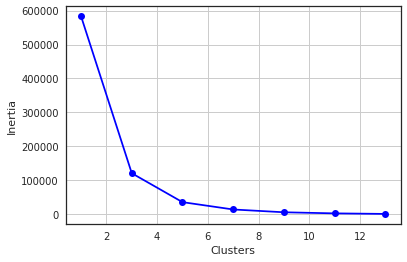

In [46]:
from sklearn.cluster import KMeans

# Range de valores de clusters que vamos testar
k = range(1,15,2)

# Lista de inércias
inertias = []

# Para cada valor de k, ache a inércia
for i in k:
    # crie a instância
    kmeans = KMeans(n_clusters=i, n_jobs=-1)

    # Treine o modelo
    model = kmeans.fit(cluster_vehicles)

    # Ache a inercia dos clusters
    inertias.append(model.inertia_)
    
plt.plot(k, inertias, '-ob')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [47]:
kmeans = KMeans(n_clusters=4, n_jobs=-1)
labels = kmeans.fit_predict(cluster_vehicles)

In [48]:
label, count = np.unique(labels, return_counts=True)
for l, c in zip(label,count):
    print('Cluster {}: {}'.format(l,c))

Cluster 0: 320527
Cluster 1: 319280
Cluster 2: 56674
Cluster 3: 143504


In [49]:
clusters_n = kmeans.labels_.astype(np.int)

In [50]:
clusters_n

array([3, 0, 3, ..., 0, 3, 0])

In [51]:
new_vehicles["cluster"] = clusters_n
new_vehicles.groupby("cluster").mean()

,count_veh,diff_cat_0,diff_cat_1
cluster,,,
0,2.000000,0.000000,1.000000
1,1.000000,1.000000,0.000000
2,3.282758,0.493524,0.506476
3,2.000000,1.000000,0.000000


In [52]:
new_vehicles.head()

,count_veh,diff_cat_0,diff_cat_1,cluster
Num_Acc,,,,
200500000001,2,1,0,3
200500000002,2,0,1,0
200500000003,2,1,0,3
200500000004,3,1,0,2
200500000005,1,1,0,1


In [54]:
cluster_vehicles["cluster_vehicles"] = clusters_n
cluster_vehicles.head()

,count_veh,diff_cat_1,cluster_carac,cluster_vehicles
Num_Acc,,,,
200500000001,2,0,3,3
200500000002,2,1,0,0
200500000003,2,0,3,3
200500000004,3,0,2,2
200500000005,1,0,1,1


In [55]:
cluster_vehicles.to_csv("vehicles_with_clusters.csv", sep=',')